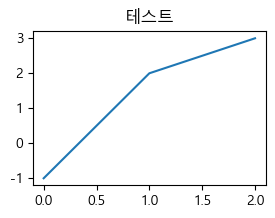

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))
pass


### 데이터프레임 생성

In [42]:
# ----------------------------
# 기상데이터 전체
# ---------------------------- 
file_path = 'data/기상데이터/기상데이터_전체.csv'
df_all = pd.read_csv(file_path, parse_dates=['일시'])
df_all.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),1시간 최다강수량(mm),일강수량(mm),연도,월
0,108,서울,1907-10-01,13.5,7.9,20.7,NaN,NaN,1907,10
1,108,서울,1907-10-02,16.2,7.9,22.0,NaN,0.2,1907,10
2,108,서울,1907-10-03,16.2,13.1,21.3,NaN,2.4,1907,10
3,108,서울,1907-10-04,16.5,11.2,22.0,NaN,NaN,1907,10
4,108,서울,1907-10-05,17.6,10.9,25.4,NaN,NaN,1907,10


In [43]:
# ----------------------------
# 지점정보
# ---------------------------- 
file_path = 'data/기상데이터/기상데이터_지점정보.csv'
df_location = pd.read_csv(file_path)
df_location.head()

,지점,지점명,데이터수,시작년도,끝년도
0,90,속초,20910,1968,2025
1,93,북춘천,3104,2016,2025
2,95,철원,13605,1988,2025
3,98,동두천,9952,1998,2025
4,99,파주,8490,2002,2025


### 지점 입력받기


In [44]:
# --------------------
# 지점 입력받기
#   location_name
# --------------------
location_name = input('지점명을 입력하세요:')


# --------------------
# 입력받은 지점의 정보 확인
# --------------------
cond = df_location['지점명']==location_name
df_location.loc[cond]

,지점,지점명,데이터수,시작년도,끝년도
11,108,서울,41936,1907,2025


### 연도별 폭염 일수

In [45]:
# ---------------------------------------
# 입력한 지점의 폭염 데이터 선택
# 폭염의 기준 : 최고기온 33도 이상
#   df_hotday
# ---------------------------------------

cond1 = df_all['지점명']==location_name
cond2 = df_all['최고기온(°C)']>=33
df_hotday = df_all.loc[cond1&cond2, ['지점명','연도', '일시','최고기온(°C)']]
df_hotday

,지점명,연도,일시,최고기온(°C)
310,서울,1908,1908-08-06,33.6
322,서울,1908,1908-08-18,33.3
324,서울,1908,1908-08-20,33.5
673,서울,1909,1909-08-04,33.2
674,서울,1909,1909-08-05,34.5
...,...,...,...,...
1595767,서울,2024,2024-09-09,34.1
1595768,서울,2024,2024-09-10,33.9
1595769,서울,2024,2024-09-11,34.6
1595775,서울,2024,2024-09-17,33.2


In [46]:
# ---------------------------------------
# 연도별 폭염일수 요약
#   df_hotday_year
# ---------------------------------------

df_hotday_year = df_hotday.groupby('연도')['최고기온(°C)'].size().to_frame()
df_hotday_year.columns = ['폭염일수']
df_hotday_year


,폭염일수
연도,
1908,3
1909,5
1910,1
1911,5
1912,3
...,...
2020,4
2021,18
2022,10


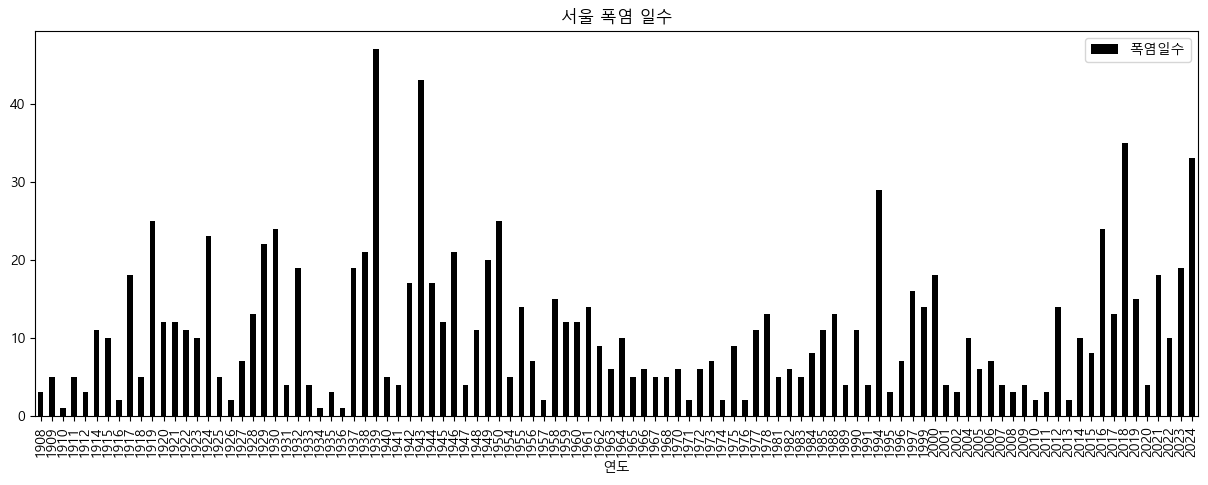

In [47]:
# ---------------------------------------
# 연도별 폭염일수 시각화
# ---------------------------------------

df_hotday_year.plot.bar(figsize=(15,5),
                        title = f'{location_name} 폭염 일수',
                        color='black');

### 연도별 열대야 일수

In [48]:
# ---------------------------------------
# 입력한 지점의 열대야 데이터 선택
# 열대야 기준 : 최저기온 25도 이상
#   df_hotnight
# ---------------------------------------

cond1 = df_all['지점명'] == location_name
cond2 = df_all['최저기온(°C)'] >= 25

df_hotnight = df_all.loc[cond1 & cond2, ['지점명','연도','일시','최저기온(°C)']]
df_hotnight

,지점명,연도,일시,최저기온(°C)
677,서울,1909,1909-08-08,25.3
678,서울,1909,1909-08-09,25.6
10357,서울,1910,1910-07-29,25.0
10359,서울,1910,1910-07-31,25.2
10736,서울,1911,1911-08-12,25.8
...,...,...,...,...
1595769,서울,2024,2024-09-11,25.4
1595772,서울,2024,2024-09-14,25.2
1595775,서울,2024,2024-09-17,25.8
1595776,서울,2024,2024-09-18,26.5


In [49]:
# ---------------------------------------
# 연도별 열대야일수 요약
#   df_hotnight_year
# ---------------------------------------

df_hotnight_year = df_hotnight.groupby('연도').size().to_frame()
df_hotnight_year.columns = ['열대야일수']
df_hotnight_year

,열대야일수
연도,
1909,2
1910,2
1911,1
1914,4
1915,3
...,...
2020,14
2021,20
2022,20


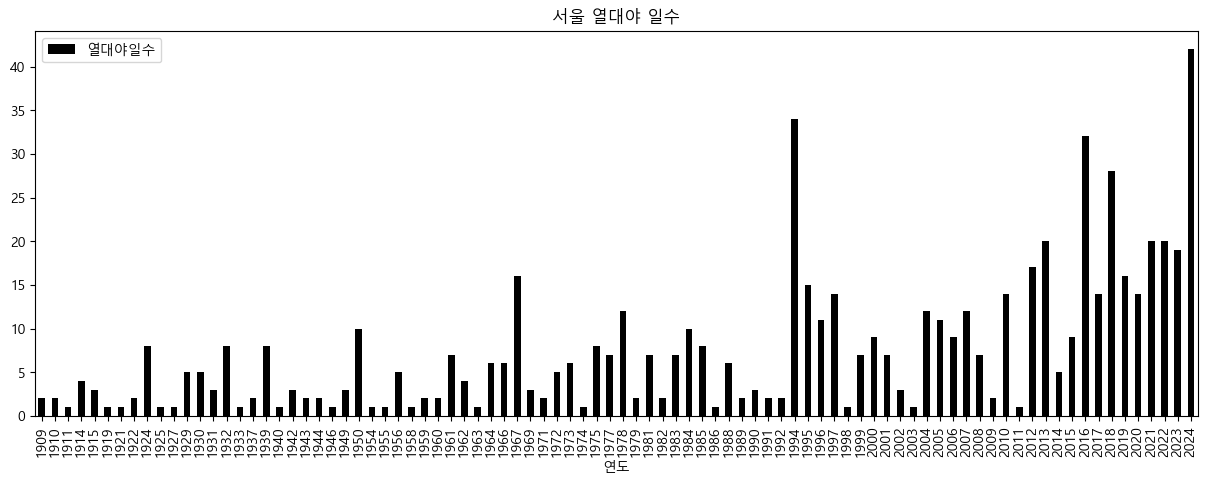

In [50]:
# ---------------------------------------
# 연도별 열대야 일수 시각화
# ---------------------------------------
df_hotnight_year.plot(kind='bar',
                      figsize=(15,5),
                      title=f'{location_name} 열대야 일수',
                      color='black');

### 연도별 가장 이른/늦은 폭염 열대야

In [51]:
# ---------------------------------------
# 가장 이른/늦은 폭염
# ---------------------------------------
df_hotday_early_late = df_hotday.groupby('연도')['일시'].agg(['min','max'])
df_hotday_early_late.columns = ['가장이른폭염일', '가장늦은폭염일']
df_hotday_early_late

,가장이른폭염일,가장늦은폭염일
연도,,
1908,1908-08-06,1908-08-20
1909,1909-08-04,1909-08-10
1910,1910-07-30,1910-07-30
1911,1911-08-09,1911-08-17
1912,1912-08-05,1912-08-11
...,...,...
2020,2020-06-13,2020-08-26
2021,2021-07-14,2021-08-09
2022,2022-07-02,2022-07-30


In [52]:
# ---------------------------------------
# 가장 이른/늦은 열대야
# ---------------------------------------
df_hotnight_early_late = df_hotnight.groupby('연도')['일시'].agg(['min','max'])
df_hotnight_early_late.columns = ['가장이른열대야일', '가장늦은열대야일']
df_hotnight_early_late

,가장이른열대야일,가장늦은열대야일
연도,,
1909,1909-08-08,1909-08-09
1910,1910-07-29,1910-07-31
1911,1911-08-12,1911-08-12
1914,1914-07-26,1914-08-15
1915,1915-07-22,1915-07-29
...,...,...
2020,2020-08-04,2020-08-29
2021,2021-07-13,2021-08-06
2022,2022-06-27,2022-08-20


### 데이터프레임 통합
* 폭염일수, 열대야일수, 가장이른폭염일, 가장늦은폭염일, 가장이른열대야일, 가장늦은열대야일

In [53]:
# ---------------------------------------------------------------------------------------
# 폭염일수, 열대야일수, 가장이른폭염일, 가장늦은폭염일, 가장이른열대야일, 가장늦은열대야일
# ---------------------------------------------------------------------------------------
df_list = [df_hotday_year, df_hotnight_year, df_hotday_early_late, df_hotnight_early_late]
df_hotdaynight = pd.concat(df_list, axis=1).sort_index()

df_hotdaynight.head(10)

,폭염일수,열대야일수,가장이른폭염일,가장늦은폭염일,가장이른열대야일,가장늦은열대야일
연도,,,,,,
1908,3.0,NaN,1908-08-06,1908-08-20,NaT,NaT
1909,5.0,2.0,1909-08-04,1909-08-10,1909-08-08,1909-08-09
1910,1.0,2.0,1910-07-30,1910-07-30,1910-07-29,1910-07-31
1911,5.0,1.0,1911-08-09,1911-08-17,1911-08-12,1911-08-12
1912,3.0,NaN,1912-08-05,1912-08-11,NaT,NaT
1914,11.0,4.0,1914-06-24,1914-08-22,1914-07-26,1914-08-15
1915,10.0,3.0,1915-07-26,1915-08-08,1915-07-22,1915-07-29
1916,2.0,NaN,1916-07-30,1916-08-27,NaT,NaT
1917,18.0,NaN,1917-06-15,1917-08-03,NaT,NaT
